In [56]:
#Importing and Initial Analysis and load the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB           
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.svm import SVC                          
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

    
%config InlineBackend.figure_format = 'retina'

# Model Accuracies
ml_accuracies = dict()
# Define colors for each subplot
colors = ['lightcoral', 'brown', 'lightseagreen', 'maroon', 'deeppink', 'darkorange', 
          'royalblue', 'darkviolet', 'gold', 'crimson', 'lightsteelblue', 'salmon', 
          'mediumseagreen', 'olivedrab', 'blue', 'limegreen', 'slateblue', 'red', 
          'steelblue', 'teal', 'peru', 'dimgray', 'violet', 'cyan']

# Load the dataset
df = pd.read_csv("cancer patient data sets.csv")


In [10]:
# Index Column now refers to patient
df.drop("Patient Id", axis=1, inplace=True)

# cleaning column names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

display(df)

print(df.info())


,index,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   age                       1000 non-null   int64 
 2   gender                    1000 non-null   int64 
 3   air_pollution             1000 non-null   int64 
 4   alcohol_use               1000 non-null   int64 
 5   dust_allergy              1000 non-null   int64 
 6   occupational_hazards      1000 non-null   int64 
 7   genetic_risk              1000 non-null   int64 
 8   chronic_lung_disease      1000 non-null   int64 
 9   balanced_diet             1000 non-null   int64 
 10  obesity                   1000 non-null   int64 
 11  smoking                   1000 non-null   int64 
 12  passive_smoker            1000 non-null   int64 
 13  chest_pain                1000 non-null   int64 
 14  coughing_of_blood        

In [11]:
print('Cancer Levels: ', df['level'].unique())

# Replacing levels of numeric int
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["level"].replace(mapping, inplace=True)
print('Cancer Levels: ', df['level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


In [12]:
round(df.describe().iloc[1:, ].T, 3).style.format(precision=3).background_gradient(axis=1)

,mean,std,min,25%,50%,75%,max
index,499.500,288.819,0.000,249.750,499.500,749.250,999.000
age,37.174,12.005,14.000,27.750,36.000,45.000,73.000
gender,1.402,0.491,1.000,1.000,1.000,2.000,2.000
air_pollution,3.840,2.030,1.000,2.000,3.000,6.000,8.000
alcohol_use,4.563,2.620,1.000,2.000,5.000,7.000,8.000
dust_allergy,5.165,1.981,1.000,4.000,6.000,7.000,8.000
occupational_hazards,4.840,2.108,1.000,3.000,5.000,7.000,8.000
genetic_risk,4.580,2.127,1.000,2.000,5.000,7.000,7.000
chronic_lung_disease,4.380,1.849,1.000,3.000,4.000,6.000,7.000
balanced_diet,4.491,2.136,1.000,2.000,4.000,7.000,7.000


In [13]:
#Splitting Into y and X 
# Showing data
X = df.drop(columns='level')
y = df.level

display(X.head())
print(y[:5])

,index,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
0,0,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4
1,1,17,1,3,1,5,3,4,2,2,...,3,1,3,7,8,6,2,1,7,2
2,2,35,1,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
3,3,37,1,7,7,7,7,6,7,7,...,8,4,2,3,1,4,5,6,7,5
4,4,46,1,6,8,7,7,7,6,7,...,9,3,2,4,1,4,2,4,2,3


0    0
1    1
2    2
3    2
4    2
Name: level, dtype: int64


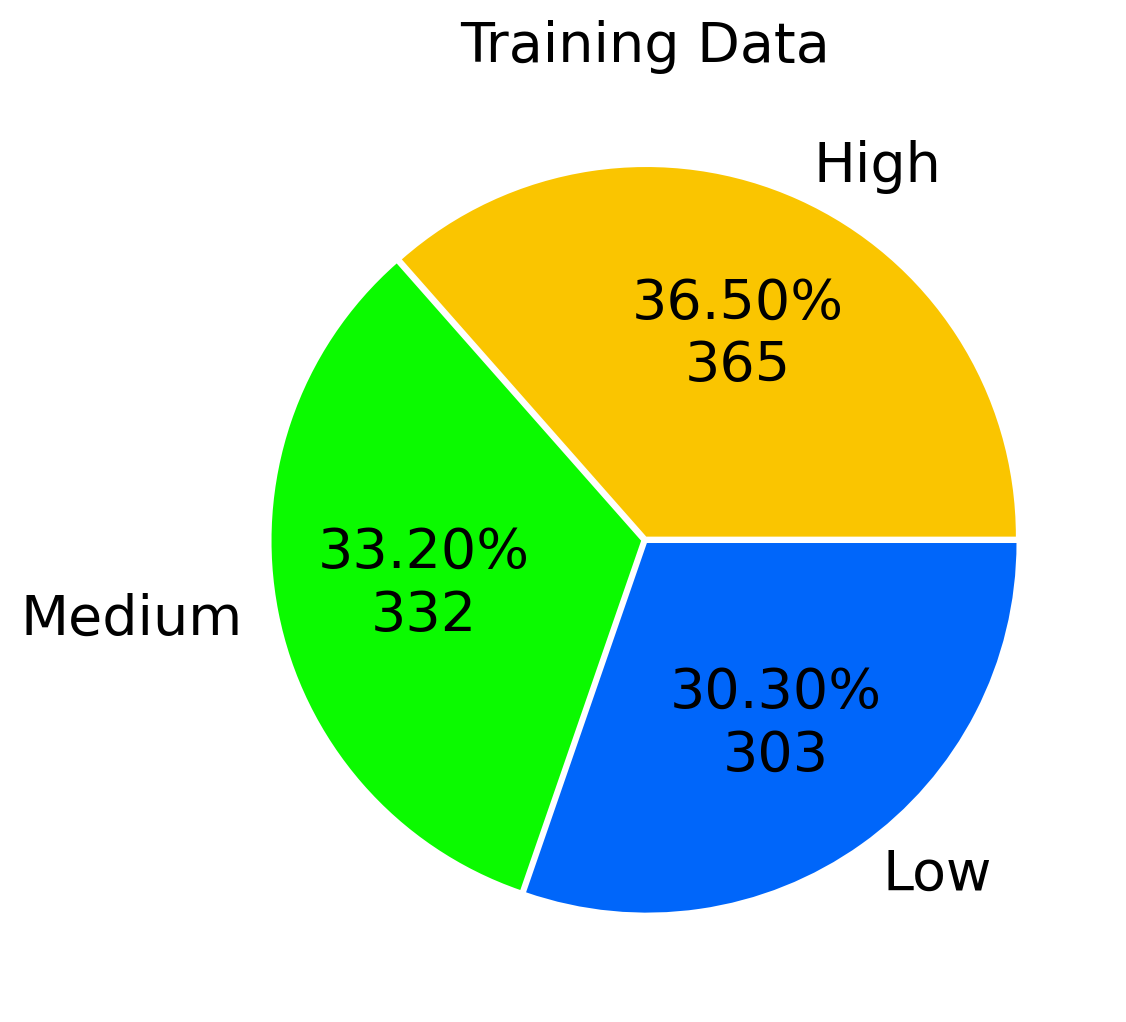

In [14]:
#Data Visualization
plt.figure(figsize=(6, 6))
plt.title('Training Data', fontsize=20)
plt.pie(df.level.value_counts(),
    labels=mapping.keys(),
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df.level.value_counts() /100)),
    explode=tuple(0.01 for i in range(3)),
    textprops={'fontsize': 20}
)
plt.show()

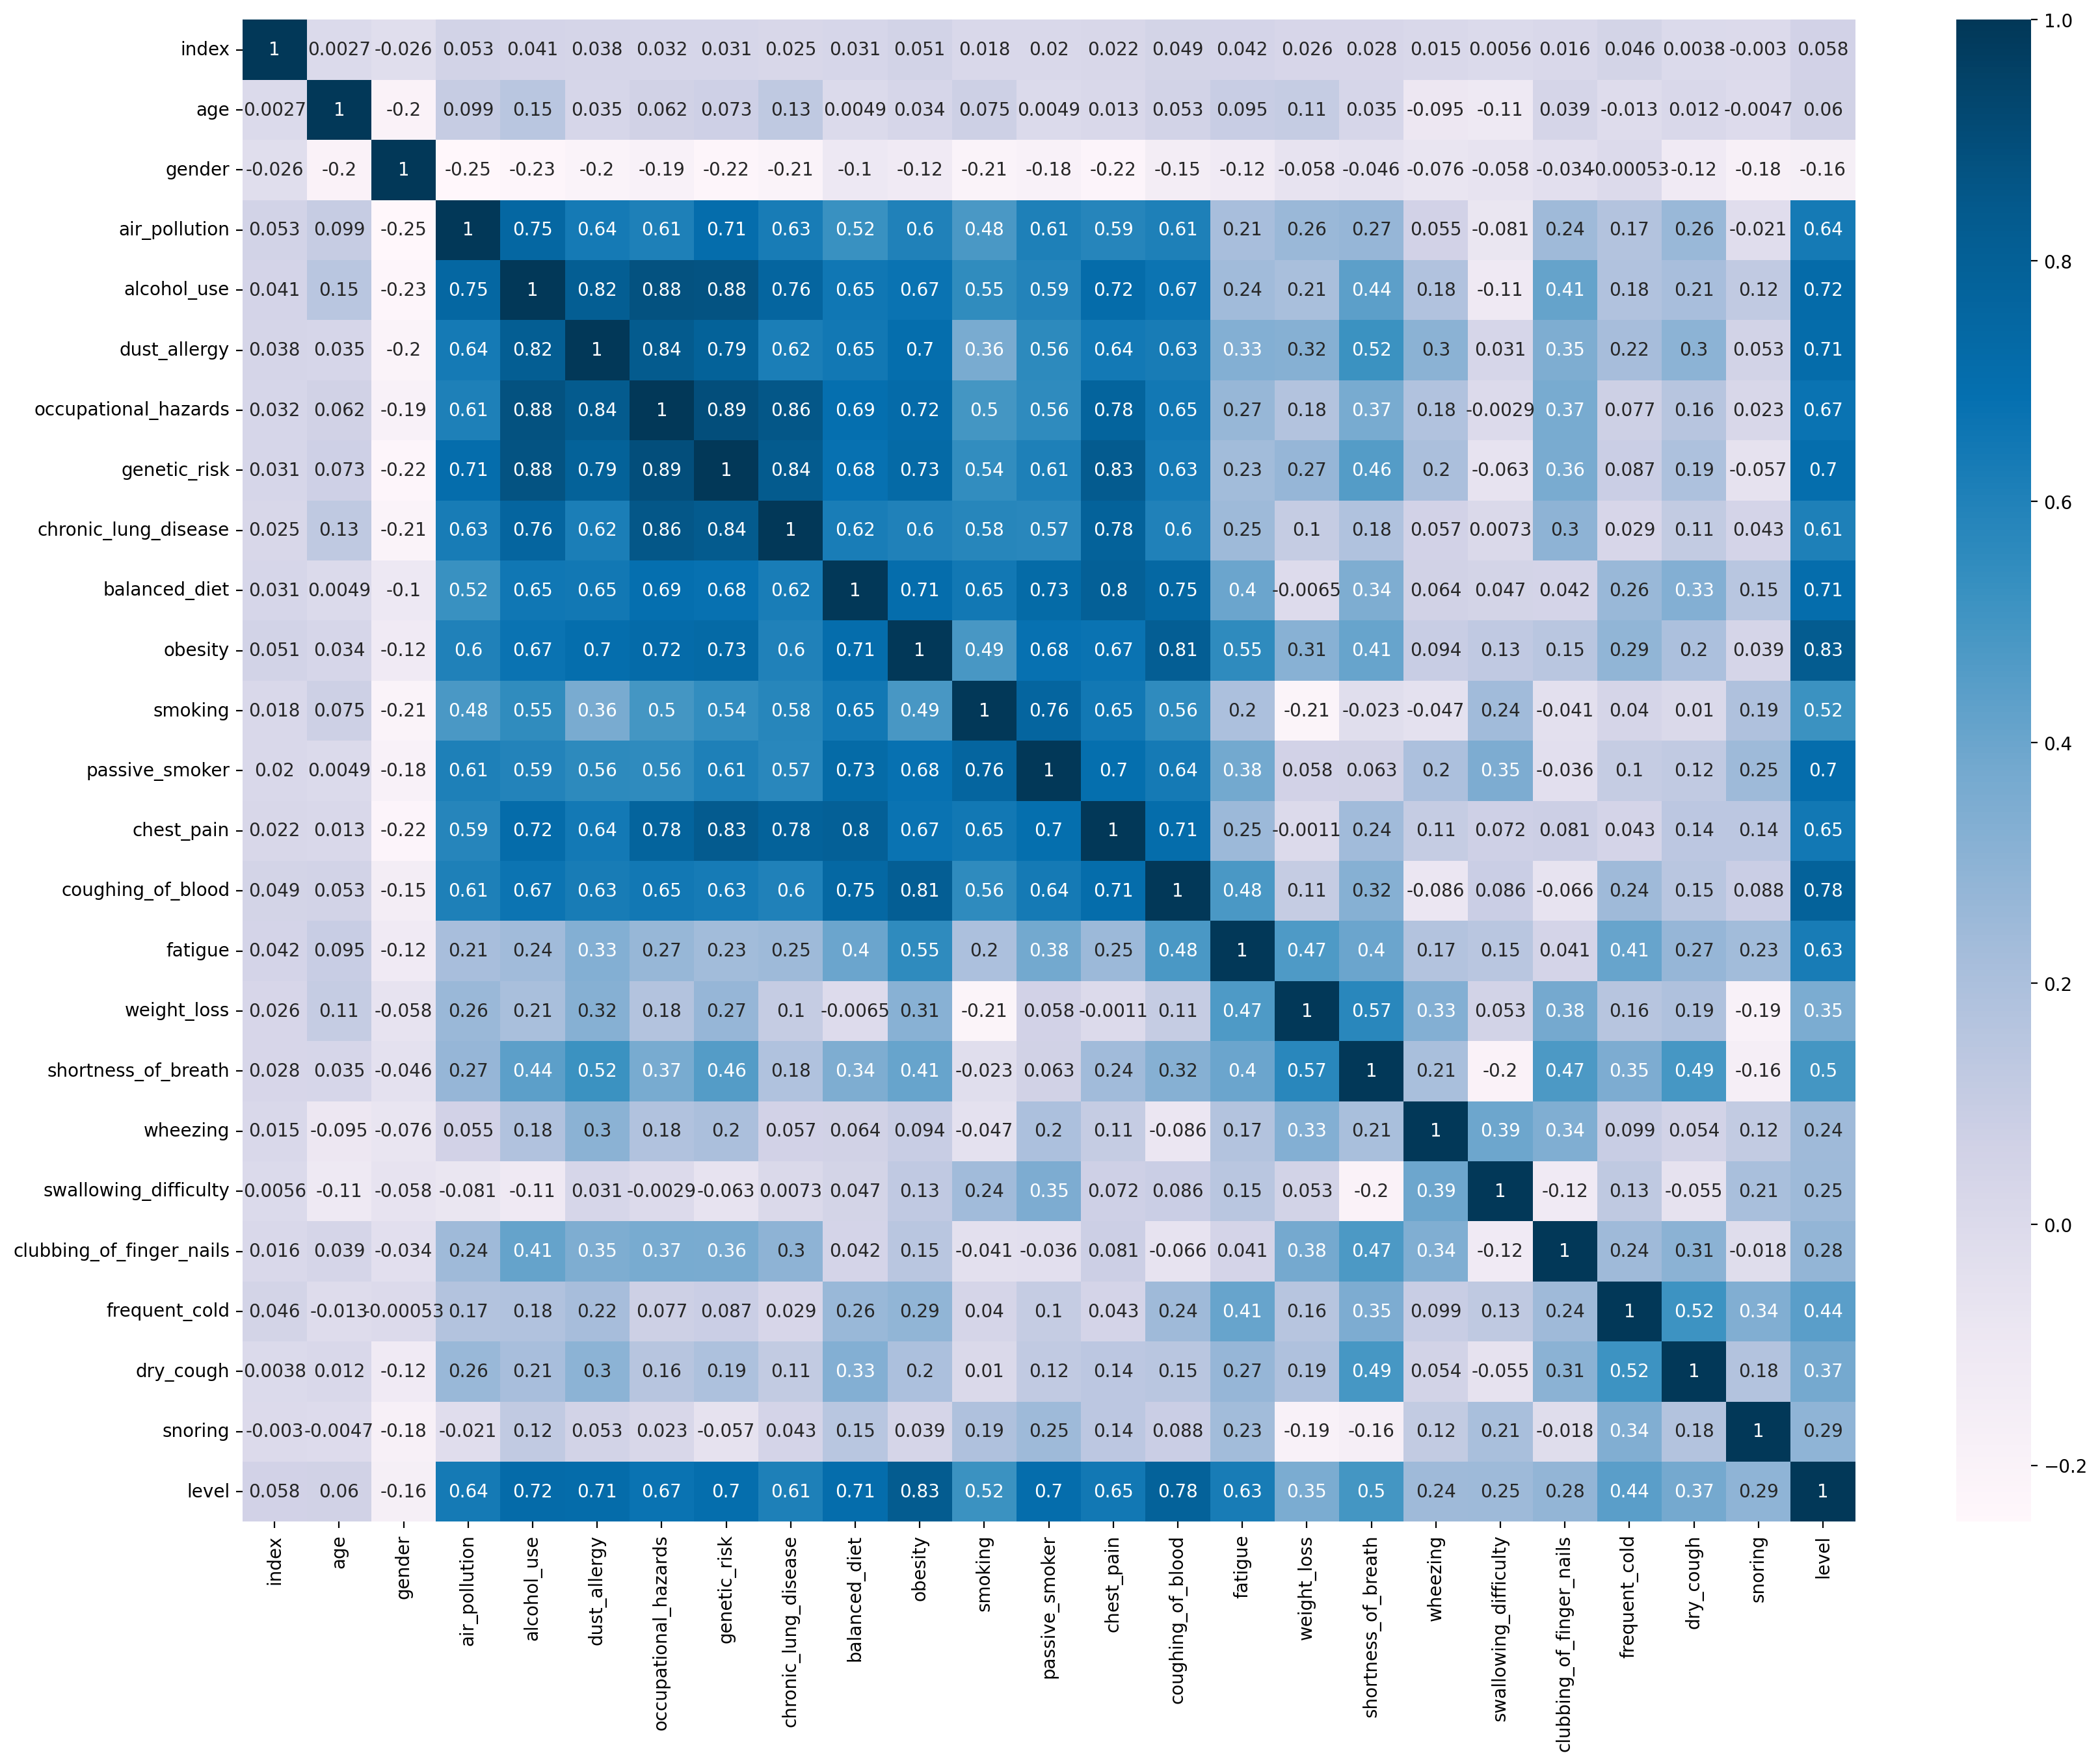

In [15]:
# Correlation plot
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

IndexError: list index out of range

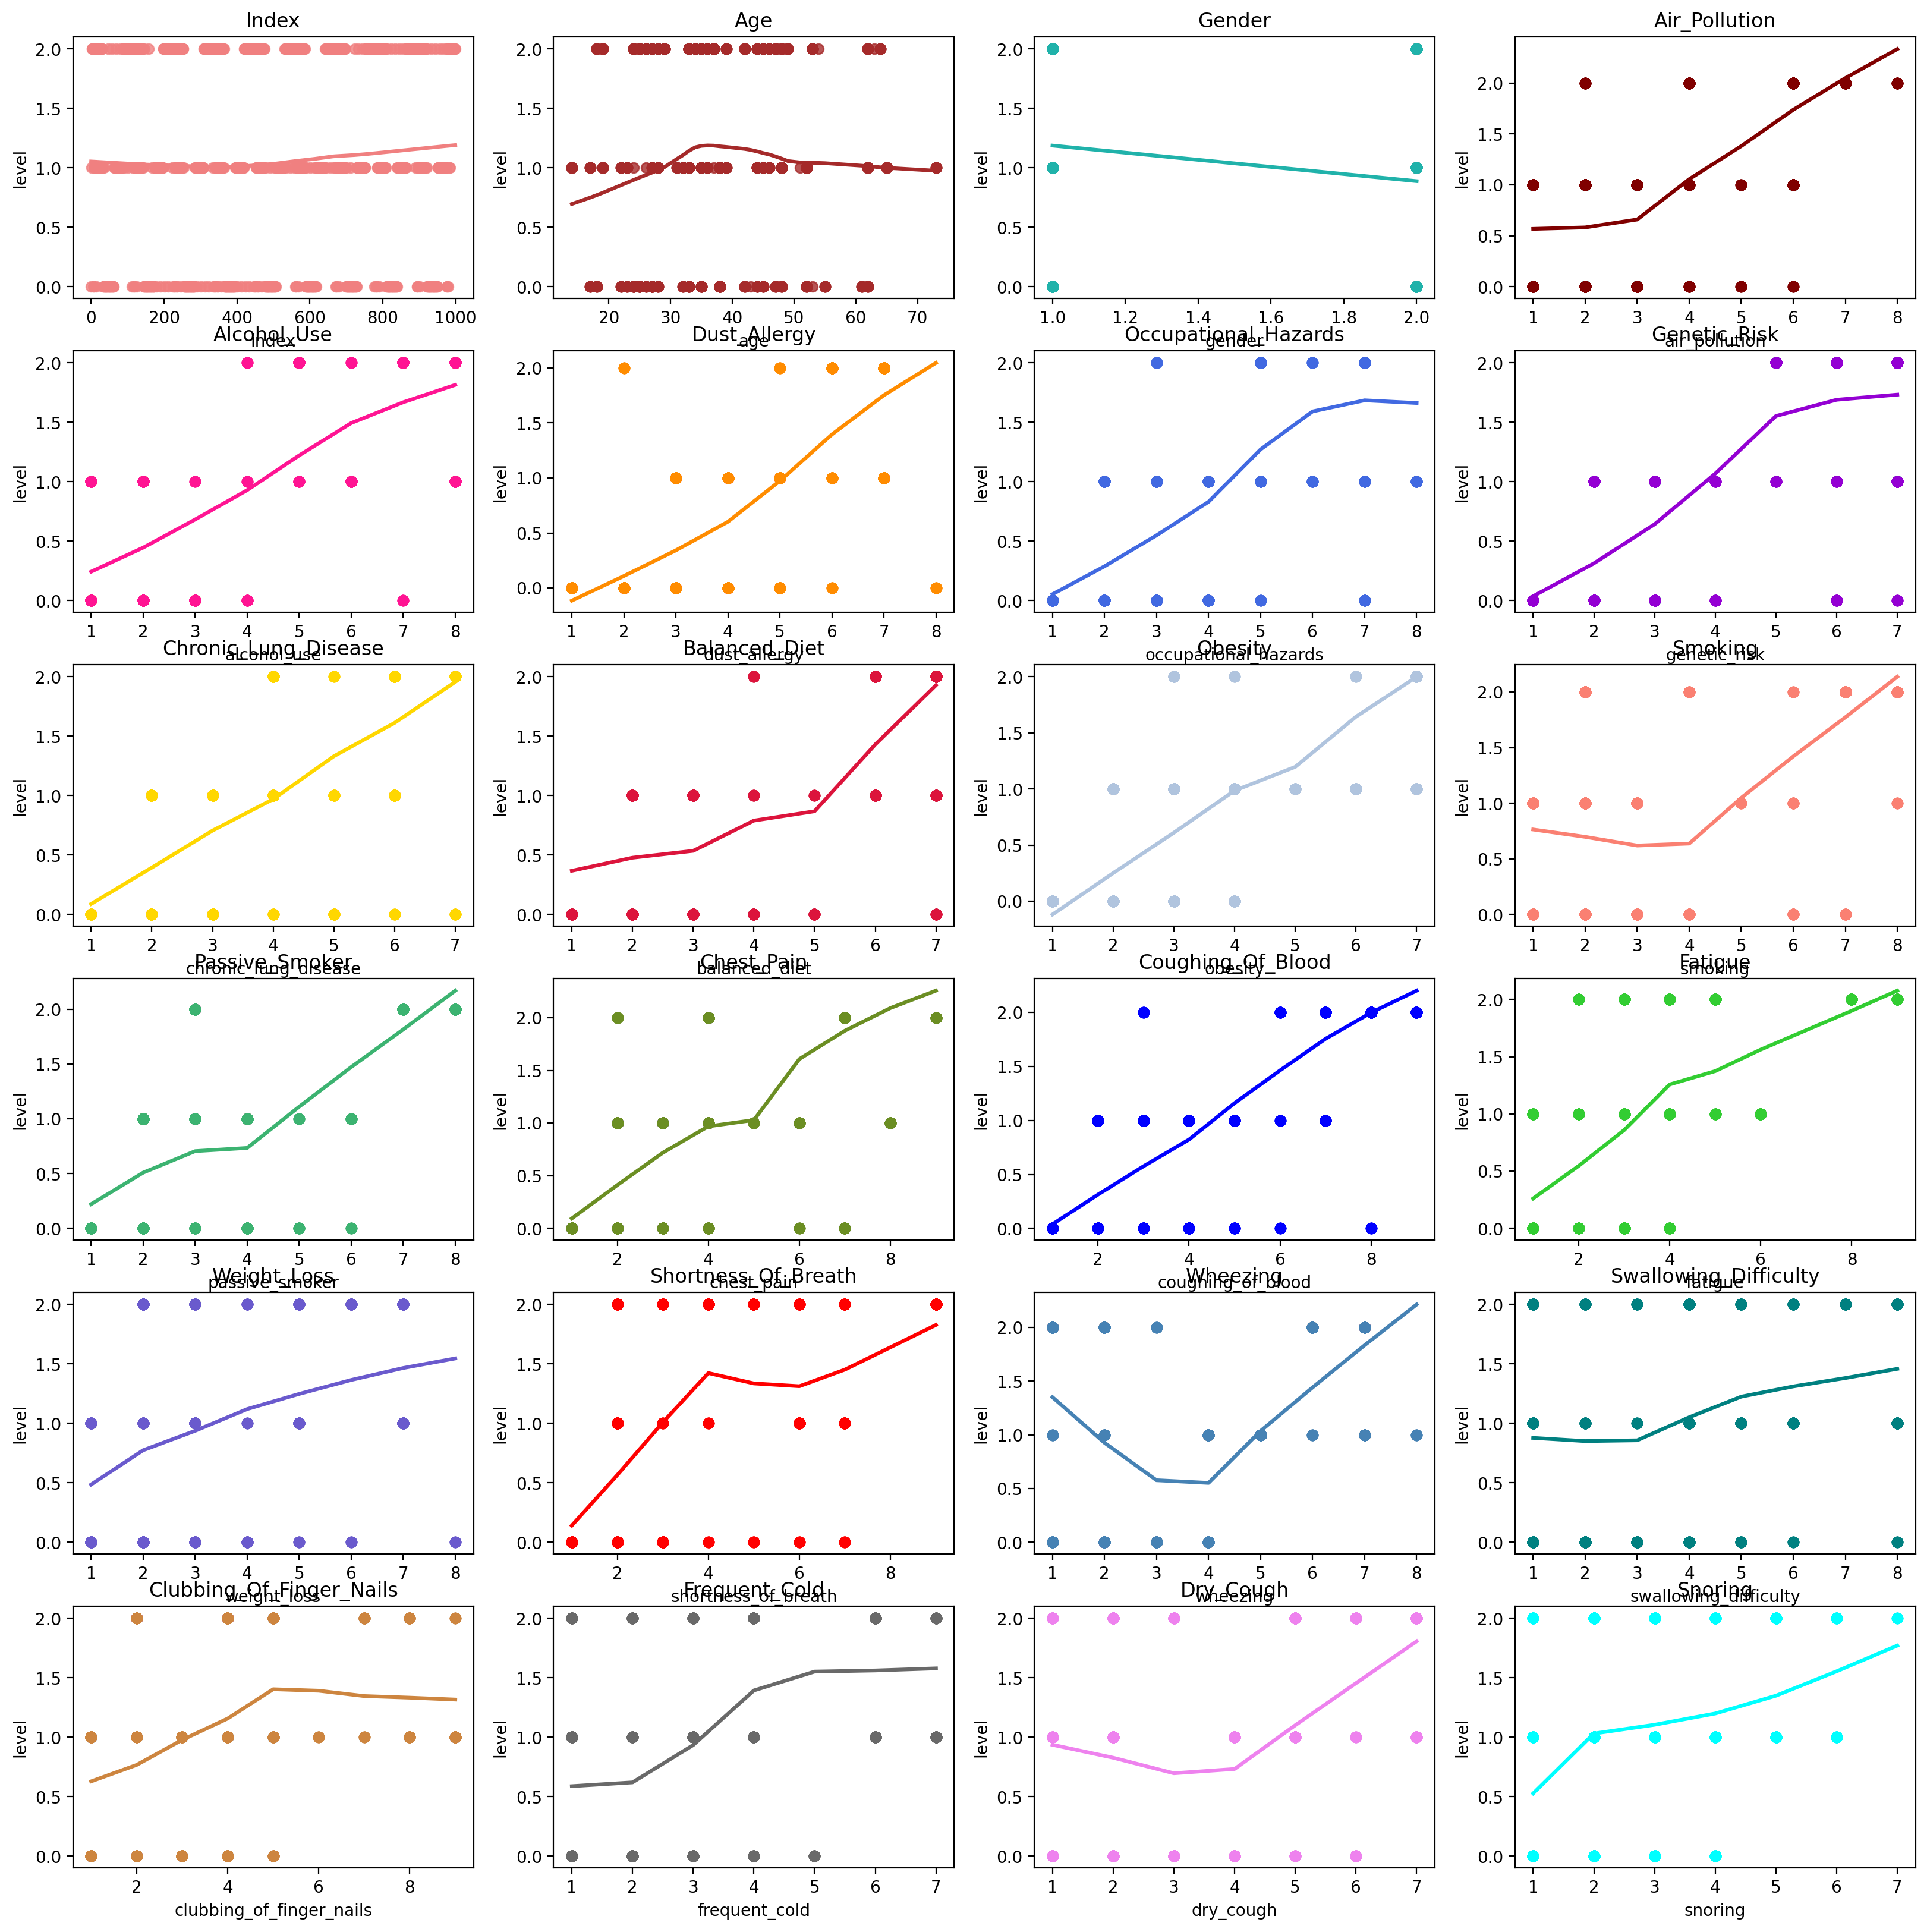

In [22]:
#a grid of scatter plots with regression line
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.regplot(x=col, y='level', data=df, lowess=True, color=colors[i], ax=ax[i])
    ax[i].set_title(col.title())
    
plt.tight_layout(pad=0.1, w_pad=0.6, h_pad=1)
plt.show()

IndexError: list index out of range

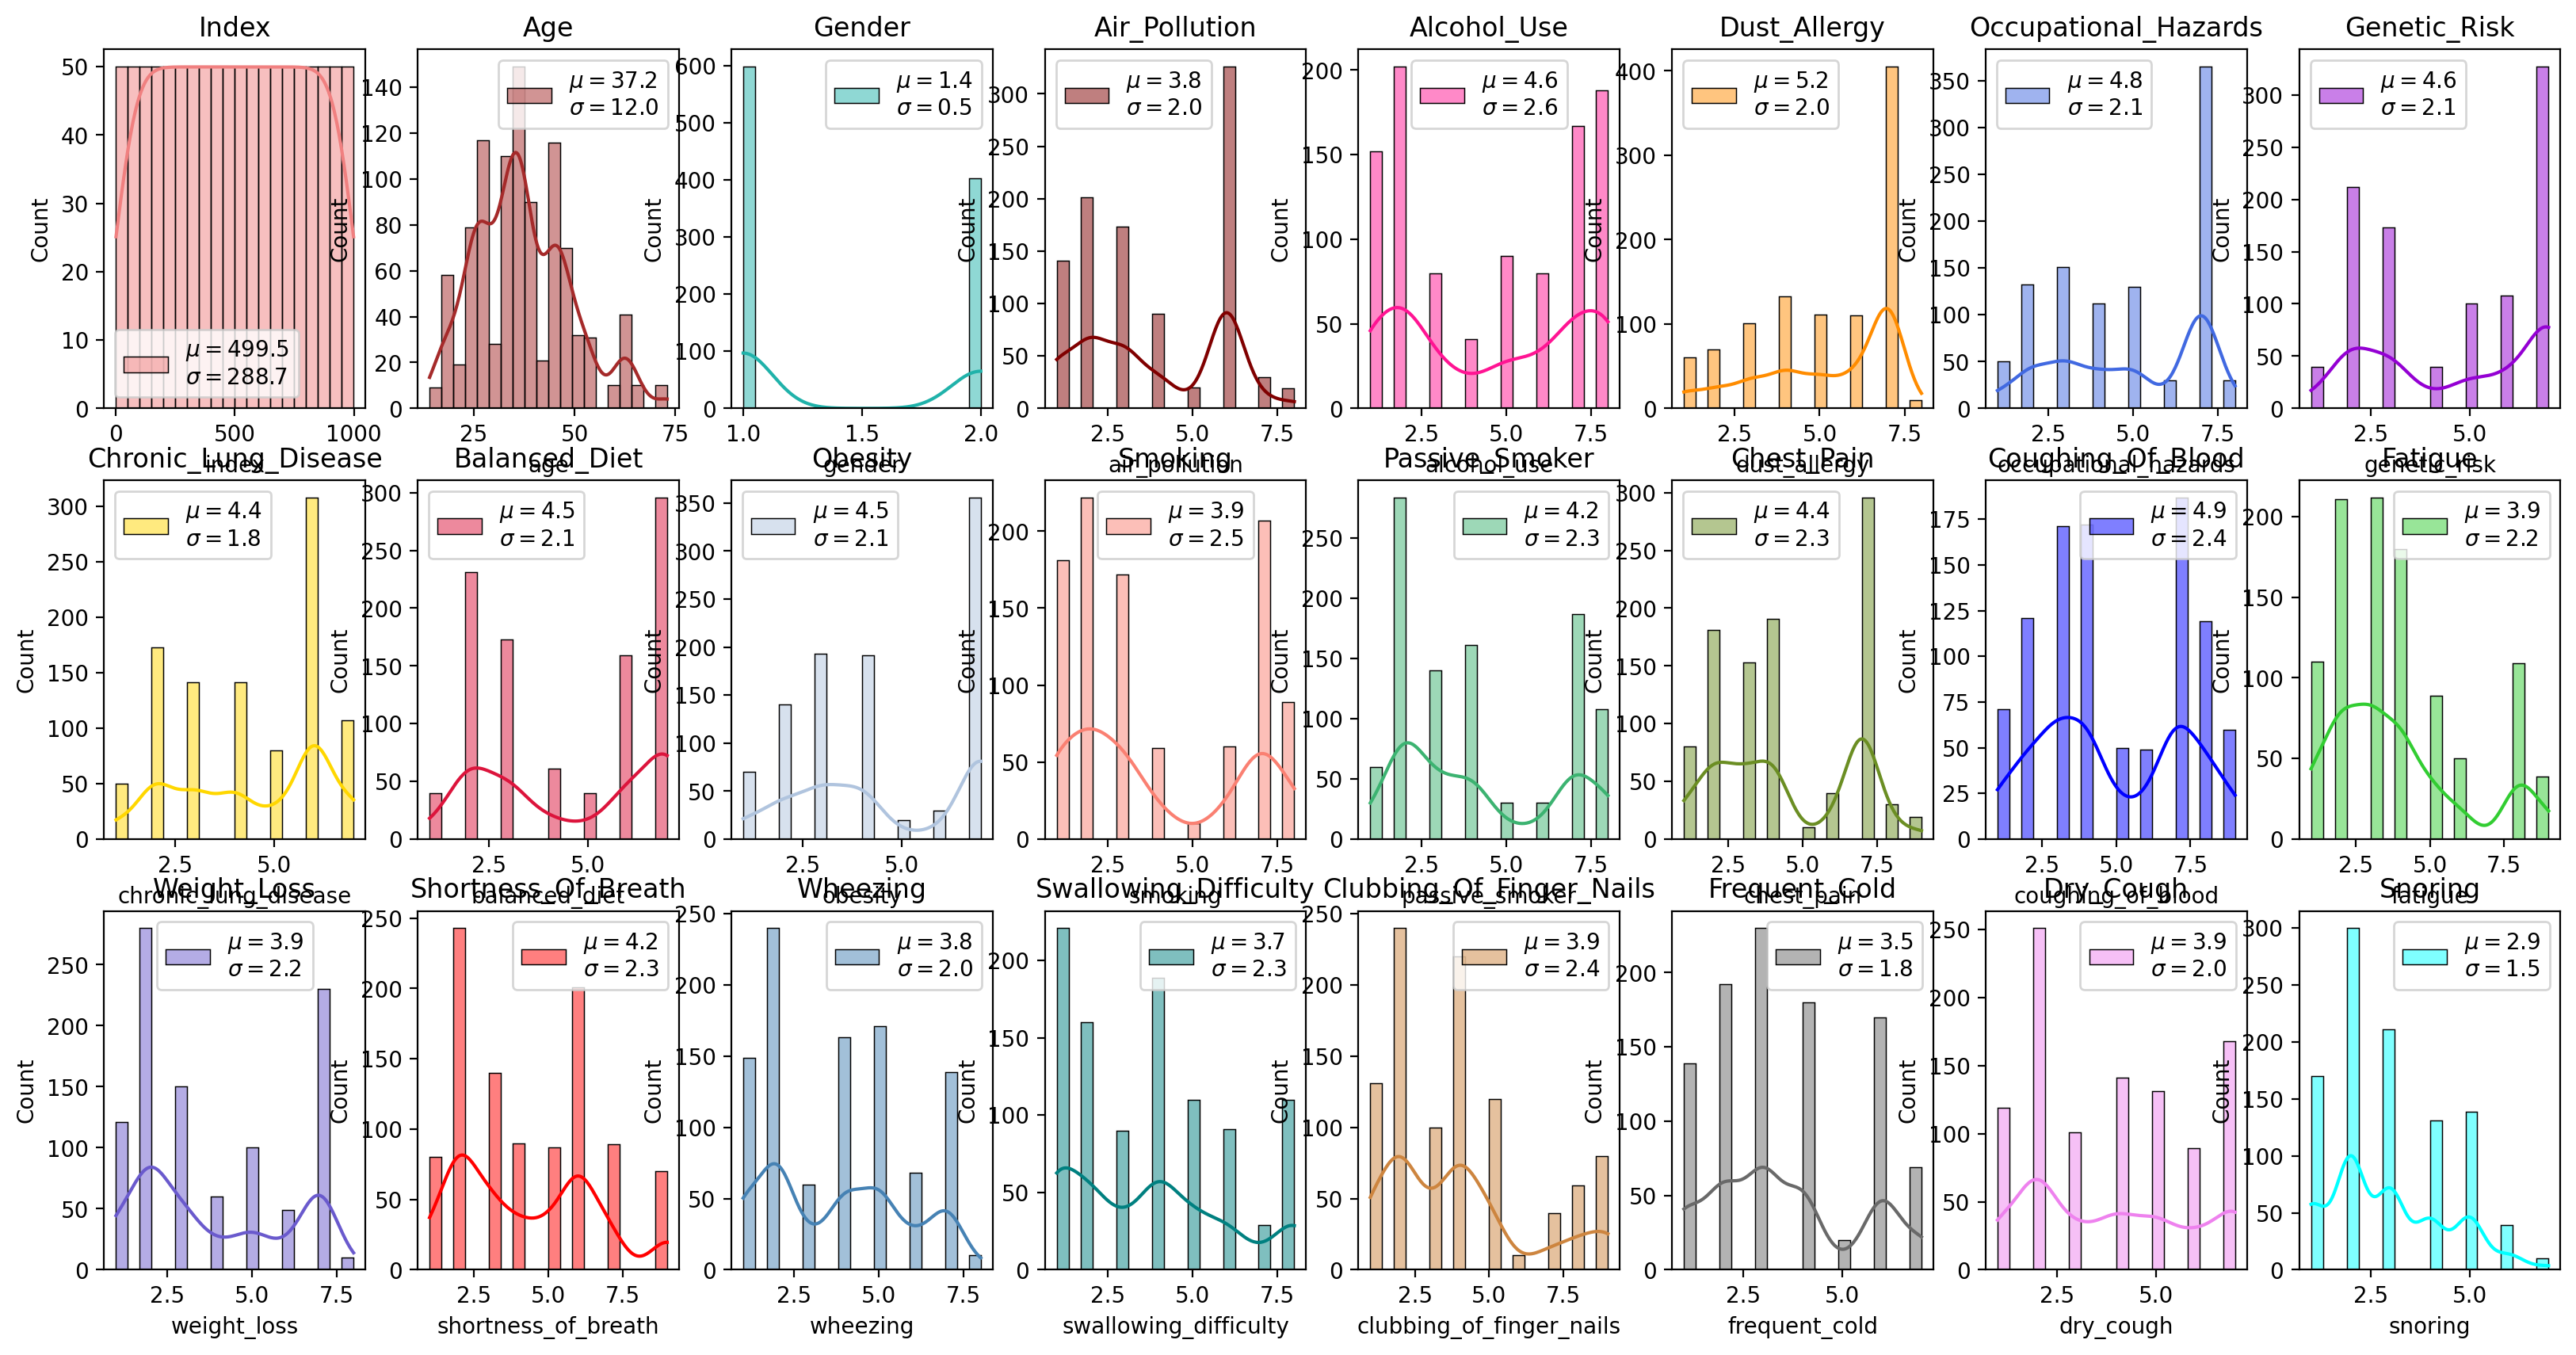

In [19]:
#a grid of histograms with fitted Gaussian
fig, ax = plt.subplots(ncols=8, nrows=3, figsize=(20, 10))
ax = ax.flatten()
i = 0

for k, v in df.items():
    mu, sigma = norm.fit(v)
    sns.histplot(v,
                 kde=True,
                 bins=20,
                 color=colors[i],
                 ax=ax[i],
                 label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
    ax[i].set_title(f'{k.title()}')
    ax[i].legend()
    i += 1
    
plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()

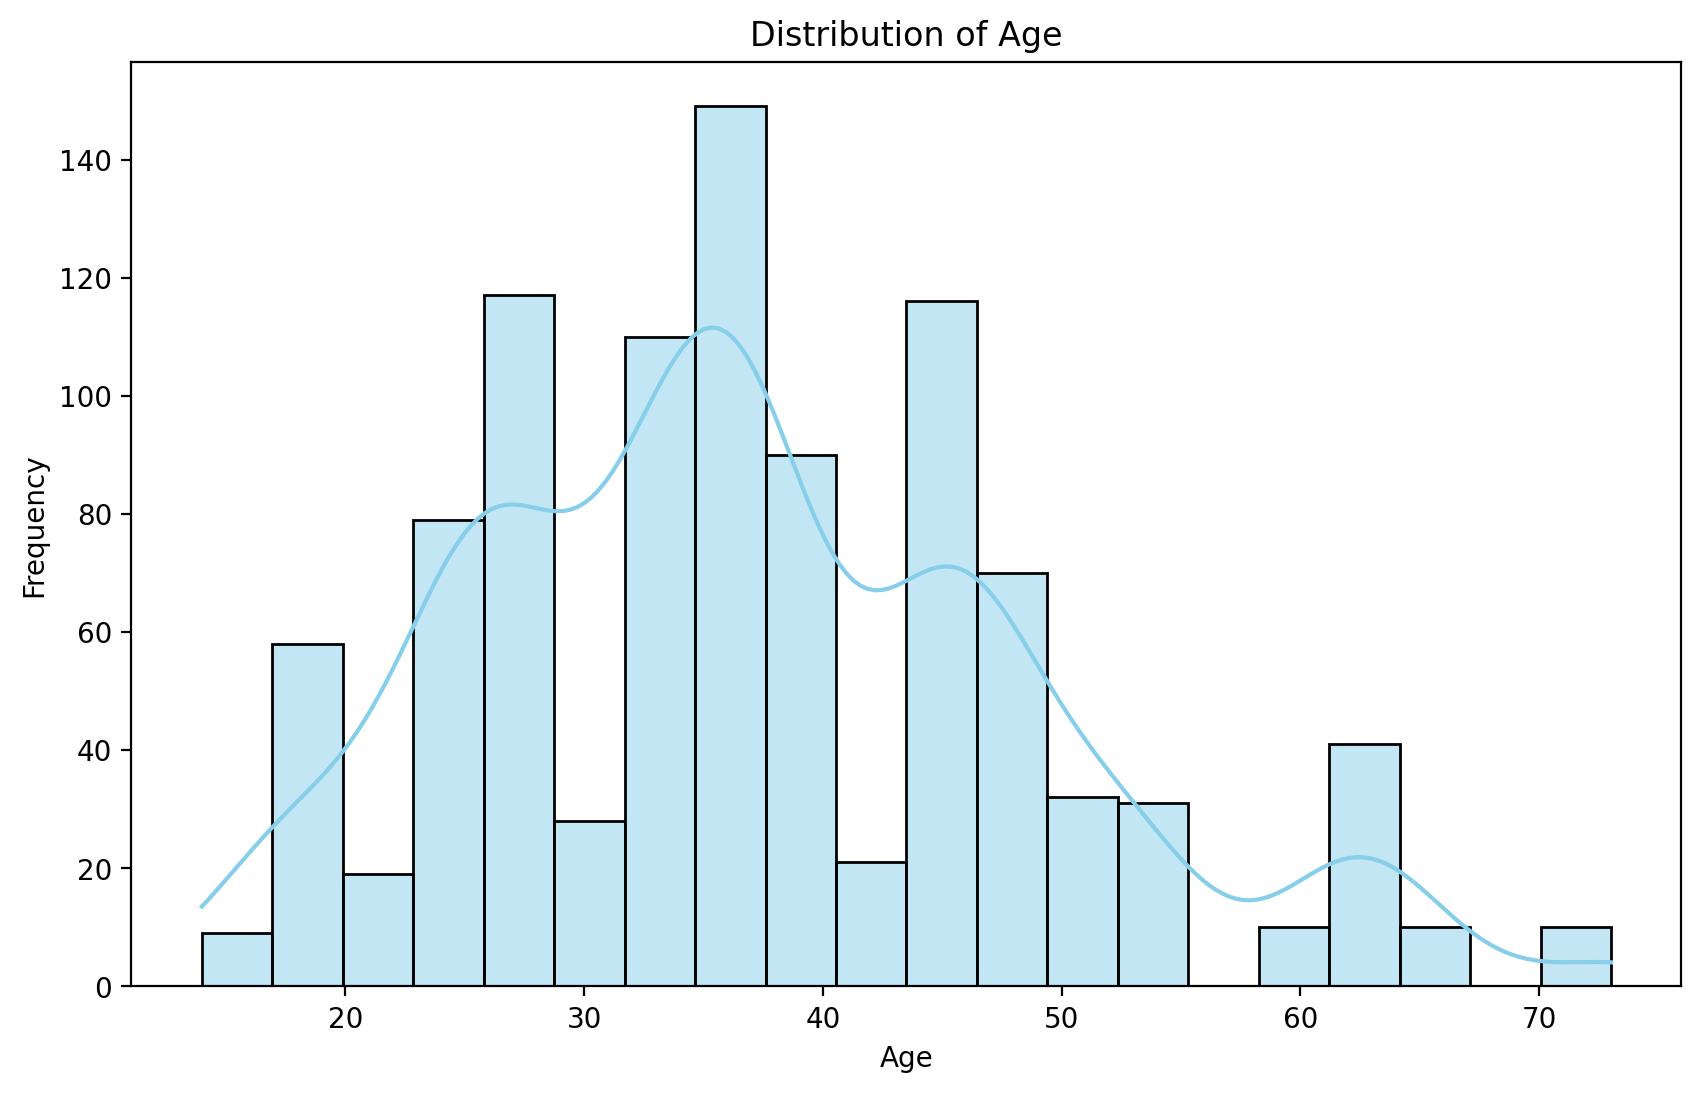

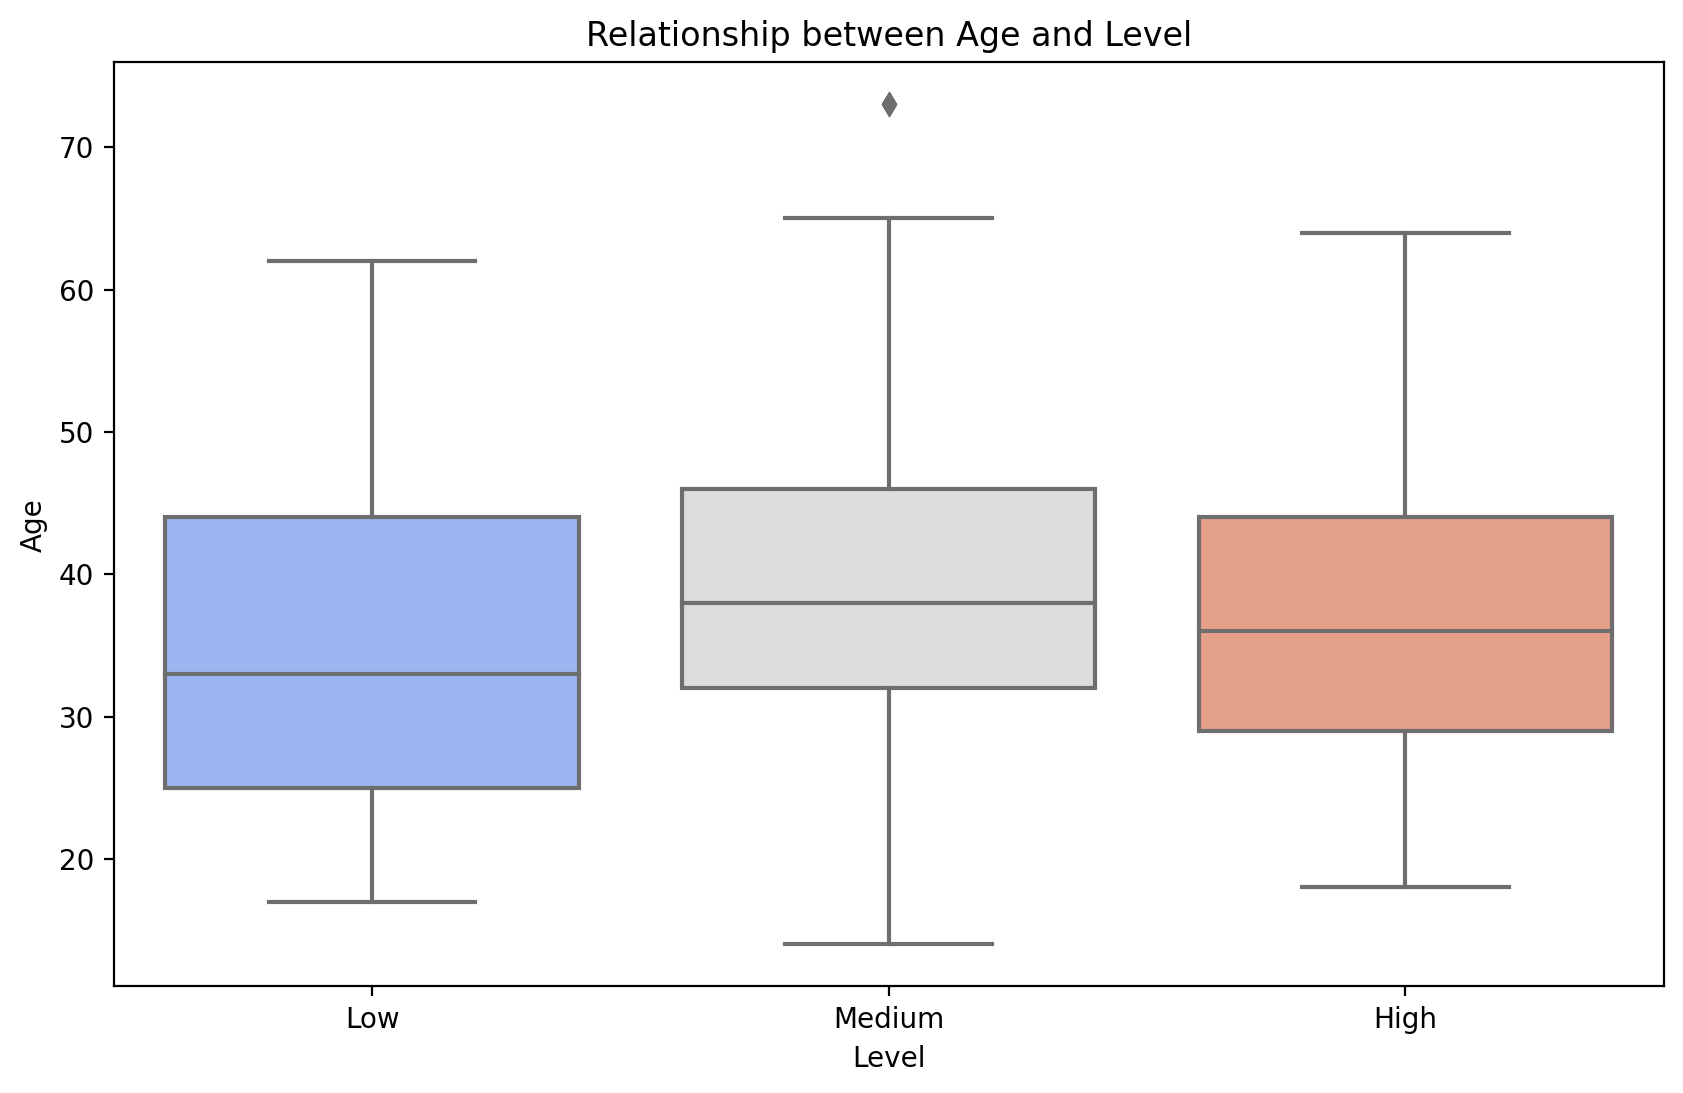

In [41]:
#univariate Analysis
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Bivariate Analysis
# Relationship between Age and Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Level', y='Age', data=df, palette='coolwarm')
plt.title('Relationship between Age and Level')
plt.xlabel('Level')
plt.ylabel('Age')
plt.show()




In [23]:
#Training Testing Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')

Shapes - X Training: (700, 24) and X Testing (300, 24)
Shapes - Y Training: (700,) and Y Testing (300,)

Training output counts
level
2    248
1    233
0    219
Name: count, dtype: int64


Classification Report for AdaBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        84
           1       0.79      0.93      0.86        99
           2       0.94      1.00      0.97       117

    accuracy                           0.90       300
   macro avg       0.91      0.88      0.89       300
weighted avg       0.91      0.90      0.89       300



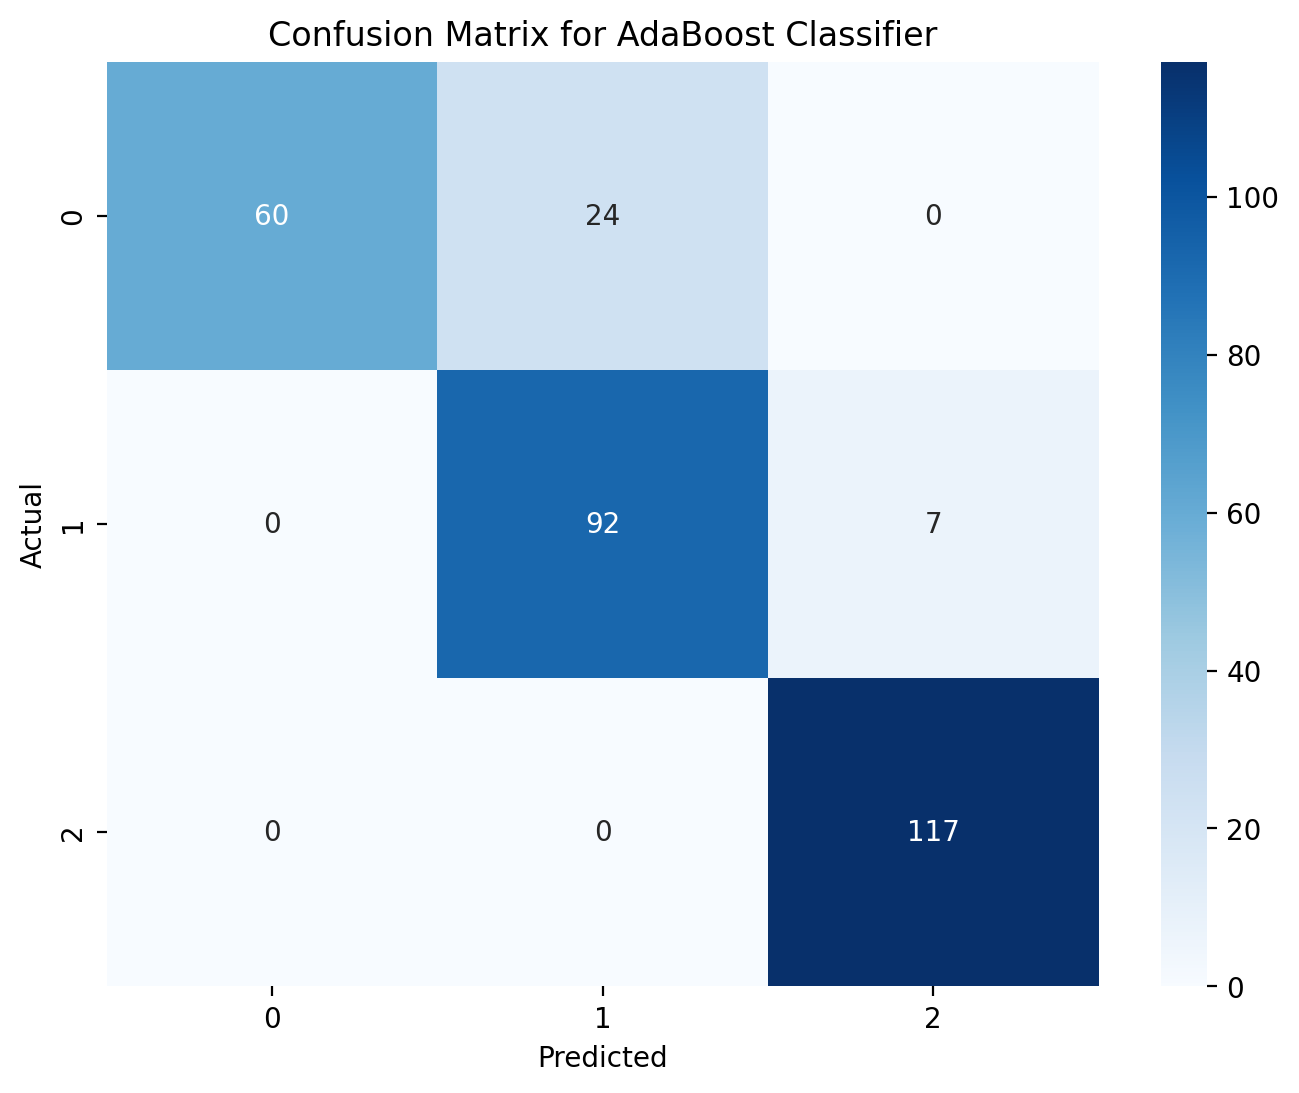

C:\Users\ahyas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ahyas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-validated scores for Logistic Regression:
[0.98571429 0.99285714 0.99285714 0.99285714 0.99285714]
Mean Cross-Validation Score of Logistic Regression: 0.9914285714285714


C:\Users\ahyas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# AdaBoost Classifier Model
abc = AdaBoostClassifier(n_estimators=10,
                         learning_rate=1.0,
                         algorithm='SAMME',  # Specify SAMME algorithm explicitly
                         random_state=None)

abc.base_estimator_ = DecisionTreeClassifier()
abc.fit(X_train, y_train)

# Predictions
y_pred1 = abc.predict(X_test)

# Classification Report
print("Classification Report for AdaBoost Classifier:")
print(classification_report(y_test, y_pred1))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

# Cross-validated scores for Logistic Regression
from sklearn.linear_model import LogisticRegression


# Compute cross-validated scores
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv=5)

# Print cross-validated scores
print("Cross-validated scores for Logistic Regression:")
print(lr_cv_scores)

# Calculate mean cross-validated score
mean_cv_score_logistic = lr_cv_scores.mean()
print("Mean Cross-Validation Score of Logistic Regression:", mean_cv_score_logistic)


Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           1       0.94      0.99      0.96        89
           2       0.99      0.92      0.95        96
           3       0.98      1.00      0.99       115

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



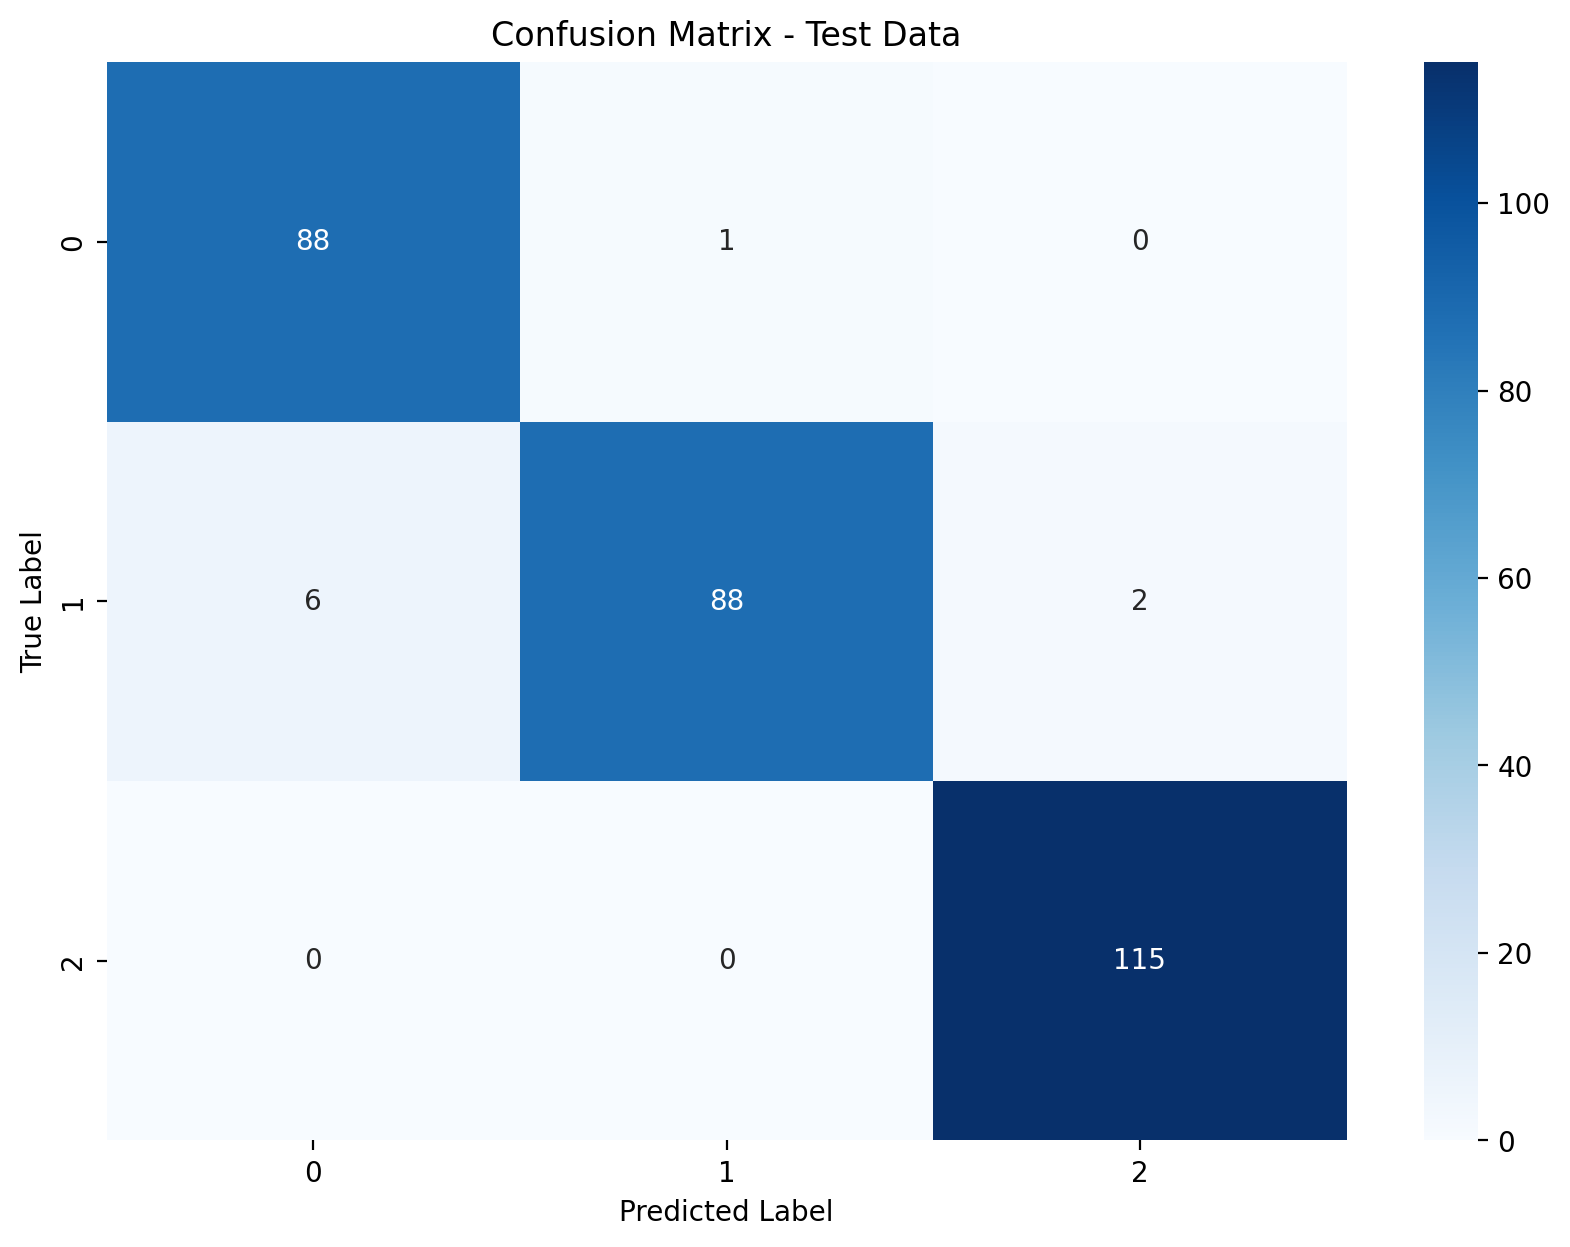

Cross-validated scores for Logistic Regression:
[0.97142857 0.96428571 0.97857143 0.96428571 0.95      ]
Mean Cross-Validation Score of Logistic Regression: 0.9657142857142856


In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



# Replace level labels with numerical values
df = df.replace({'Level': {'Low': 1, 'Medium': 2, 'High': 3}})

# Drop 'Patient Id' column
X = df.drop(['Level', 'Patient Id'], axis=1)
y = df['Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Logistic Regression Model
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

# Predictions
y_test_hat = classifier.predict(X_test)

# Classification Report
classification_rep = classification_report(y_test, y_test_hat)
print("Classification Report for Logistic Regression Model:")
print(classification_rep)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Cross-validated scores for Logistic Regression
lr_cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)

# Print cross-validated scores
print("Cross-validated scores for Logistic Regression:")
print(lr_cv_scores)

# Calculate mean cross-validated score
mean_cv_score_logistic = lr_cv_scores.mean()
print("Mean Cross-Validation Score of Logistic Regression:", mean_cv_score_logistic)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}
Classification Report for the Best Logistic Regression Model:
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        89
           2       1.00      0.97      0.98        96
           3       1.00      1.00      1.00       115

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



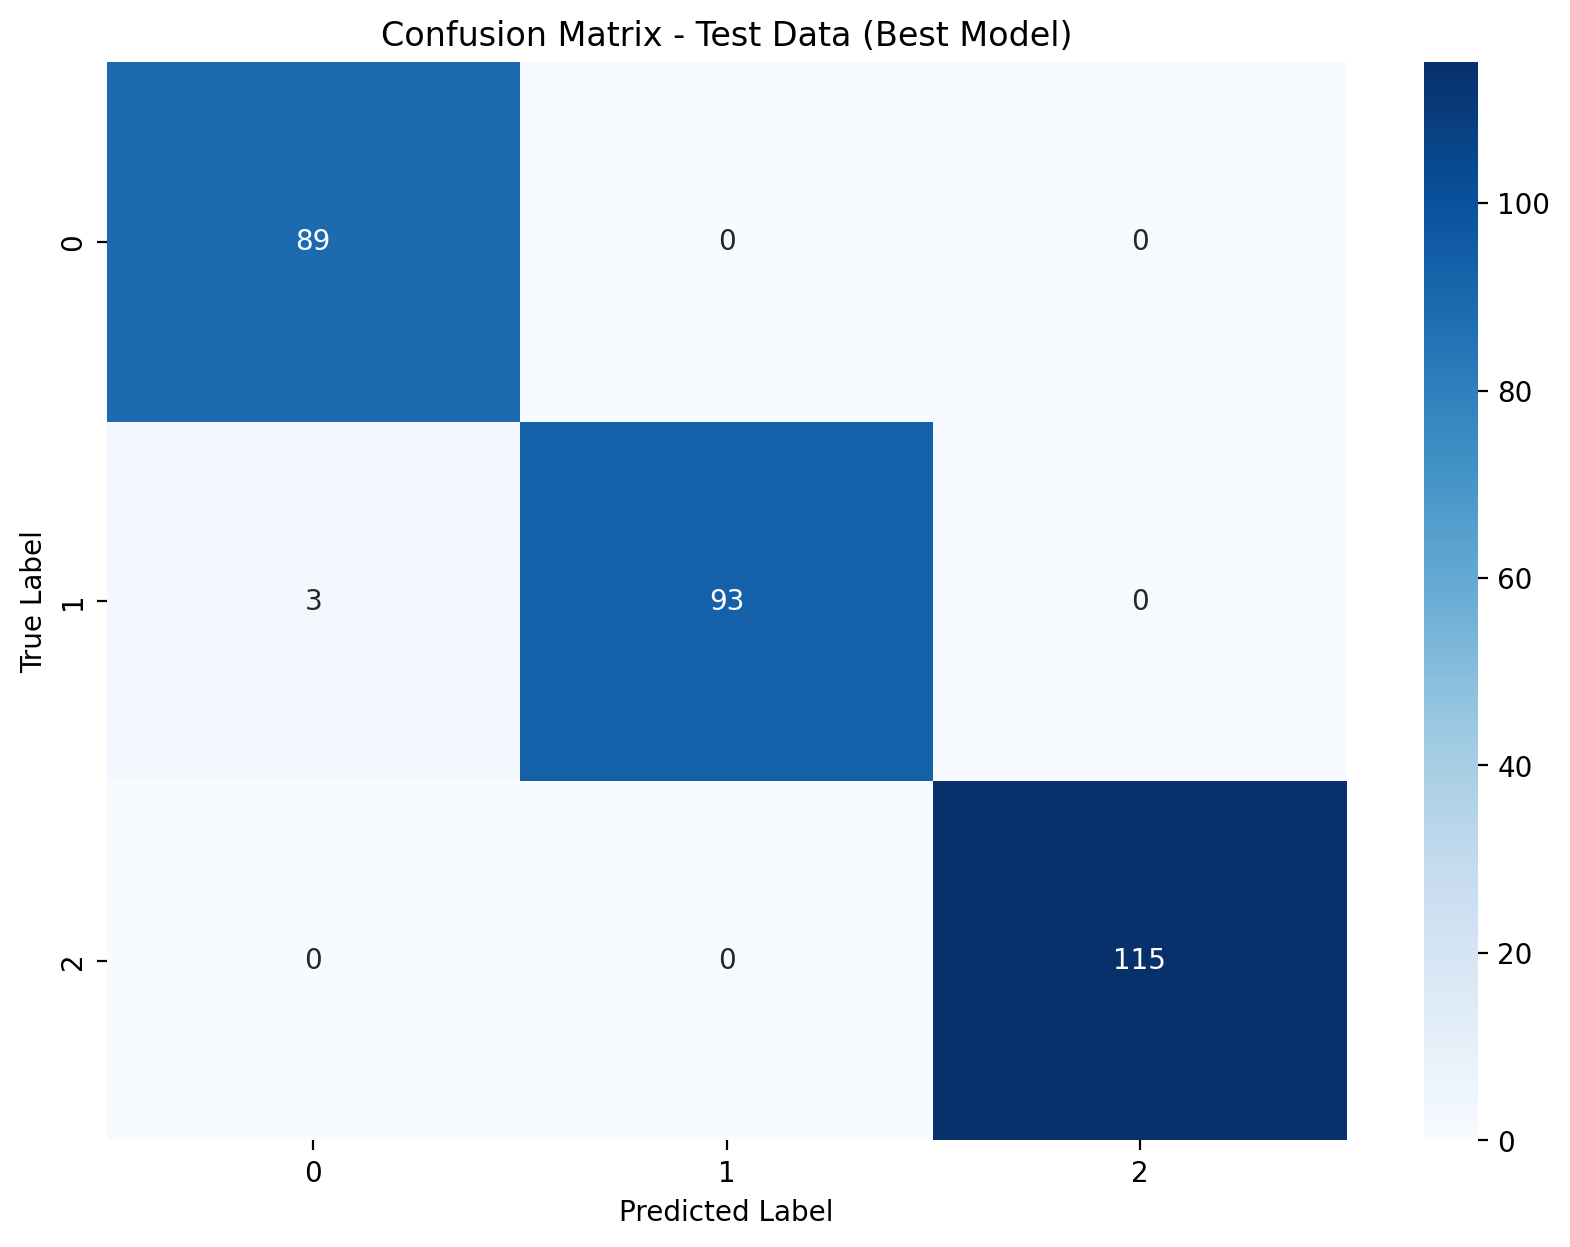

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga'],       # Solver for optimization problem
    'max_iter': [100, 200, 300, 400, 500]  # Maximum number of iterations
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_classifier = grid_search.best_estimator_

# Evaluate the best model
y_test_hat_best = best_classifier.predict(X_test)

# Classification Report for the best model
classification_rep_best = classification_report(y_test, y_test_hat_best)
print("Classification Report for the Best Logistic Regression Model:")
print(classification_rep_best)

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_test, y_test_hat_best)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Test Data (Best Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
